In [27]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing


df = pd.read_csv("./assets/iris.data", sep=",")
df.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'Class']
# df set the first row of iris.data as the column's name so we'll miss a set of data 
# we'll hardcode the first row of data
df.loc[-1] = [5.1, 3.5, 1.4, .2, 'Iris-setosa']
df.index = df.index + 1
df = df.sort_index()

x = df.iloc[:,:4] 
y = df.iloc[:,4]



In [28]:
# Functions

def Rand(size):
    _Rand = np.random.rand(size)
    return _Rand

def Sigmoid(input_):
    _Sigmoid = (2 / (1 + np.exp(-input_)) ) - 1
    return _Sigmoid

def tanh(_input):
    return np.tanh(x)

def ReLU(_input):
    if _input < 0:
        return 0
    else:
        return 0.01 * _input
    
def O(feature, weight, fcn):
    if fcn == 'sigmoid':
        return Sigmoid(np.dot(feature, weight))
    elif fcn == 'tanh':
        return tanh(np.dot(feature, weight))
    elif fcn == 'ReLU':
        return ReLU(np.dot(feature, weight))
    else:
        return -1

In [29]:
# Hyper_params

# w = Rand(x.shape[1])
W = [Rand(x.shape[1] + 1) for i in range(3)]  # +1 for bias
w = np.asarray(W)
learning_rate = 0.1
E_max = 1e6
epoch = 20

In [30]:
# normalizing data:

scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(x)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
x = scaled_df

# adding bias:
x['bias'] = -1

x.shape[0]

150

Text(0.5, 0, 'Epoch number ')

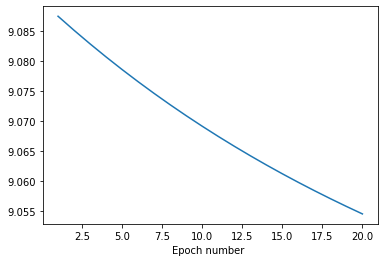

In [36]:
# Training:

e_lst_learn = []
_class = ["Iris-setosa", "Iris-versicolour", "Iris-virginica"]
for j in range(epoch):
    E = 0
    for i in range(len(x)):
        
        for z in range(3):
            
            label = y[i]
            if label == _class[z]:
                flag = 1
            else:
                flag = 0
            
            o = O(x.iloc[i], w[z], 'sigmoid')
            w[z] += (0.5 * learning_rate * (flag - o) * (1 - o ** 2) * x.iloc[i])
            E += (0.5 * (flag - o) ** 2)
#             print(o)
#             print(E)
#             print(w)
    e_lst_learn.append(E)

import matplotlib.pyplot as plt
iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)
plt.xlabel('Epoch number ')

In [32]:
# [_class.get(i) for i in _class]
e_lst_learn

[0.777517165640149,
 1.5876646954559162,
 2.3331017310589908,
 3.045840653892525,
 3.6307807738389157,
 4.1070605931374775,
 4.644511603298911,
 5.139425883481805,
 5.71952824806921,
 6.2149329735926315,
 6.565128246906916,
 6.94225147509426,
 7.383694326791044,
 7.834755876140616,
 8.068232530176463,
 8.262037353281695,
 8.47260665623336,
 8.716221292545688,
 8.90120140486008,
 9.08424966824769,
 9.294165823789067,
 9.463876398226901,
 9.664573872294808,
 9.849892183599444,
 10.02876634222799,
 10.257864610546314,
 10.413482109013138,
 10.557147349879862,
 10.706940980800756,
 10.882425375552167,
 11.061093379730043,
 11.18117050137766,
 11.258362161887803,
 11.33067080314099,
 11.496583284245336,
 11.640839488774466,
 11.738193837557207,
 11.887126572560616,
 12.058771078594388,
 12.1553546289613,
 12.242615261481255,
 12.510521829080755,
 12.634052782288498,
 12.707978019761935,
 12.766656750010112,
 12.886904318437763,
 12.941119003240486,
 13.044212969452325,
 13.098760098095353,
